In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
Df = pd.read_csv('Faellesdata_cleaned.csv')

In [3]:
x_train, x_test, y_train, y_test = train_test_split(Df.drop('IsMigratorInt', axis=1), Df['IsMigratorInt'], test_size=0.2, random_state=42)

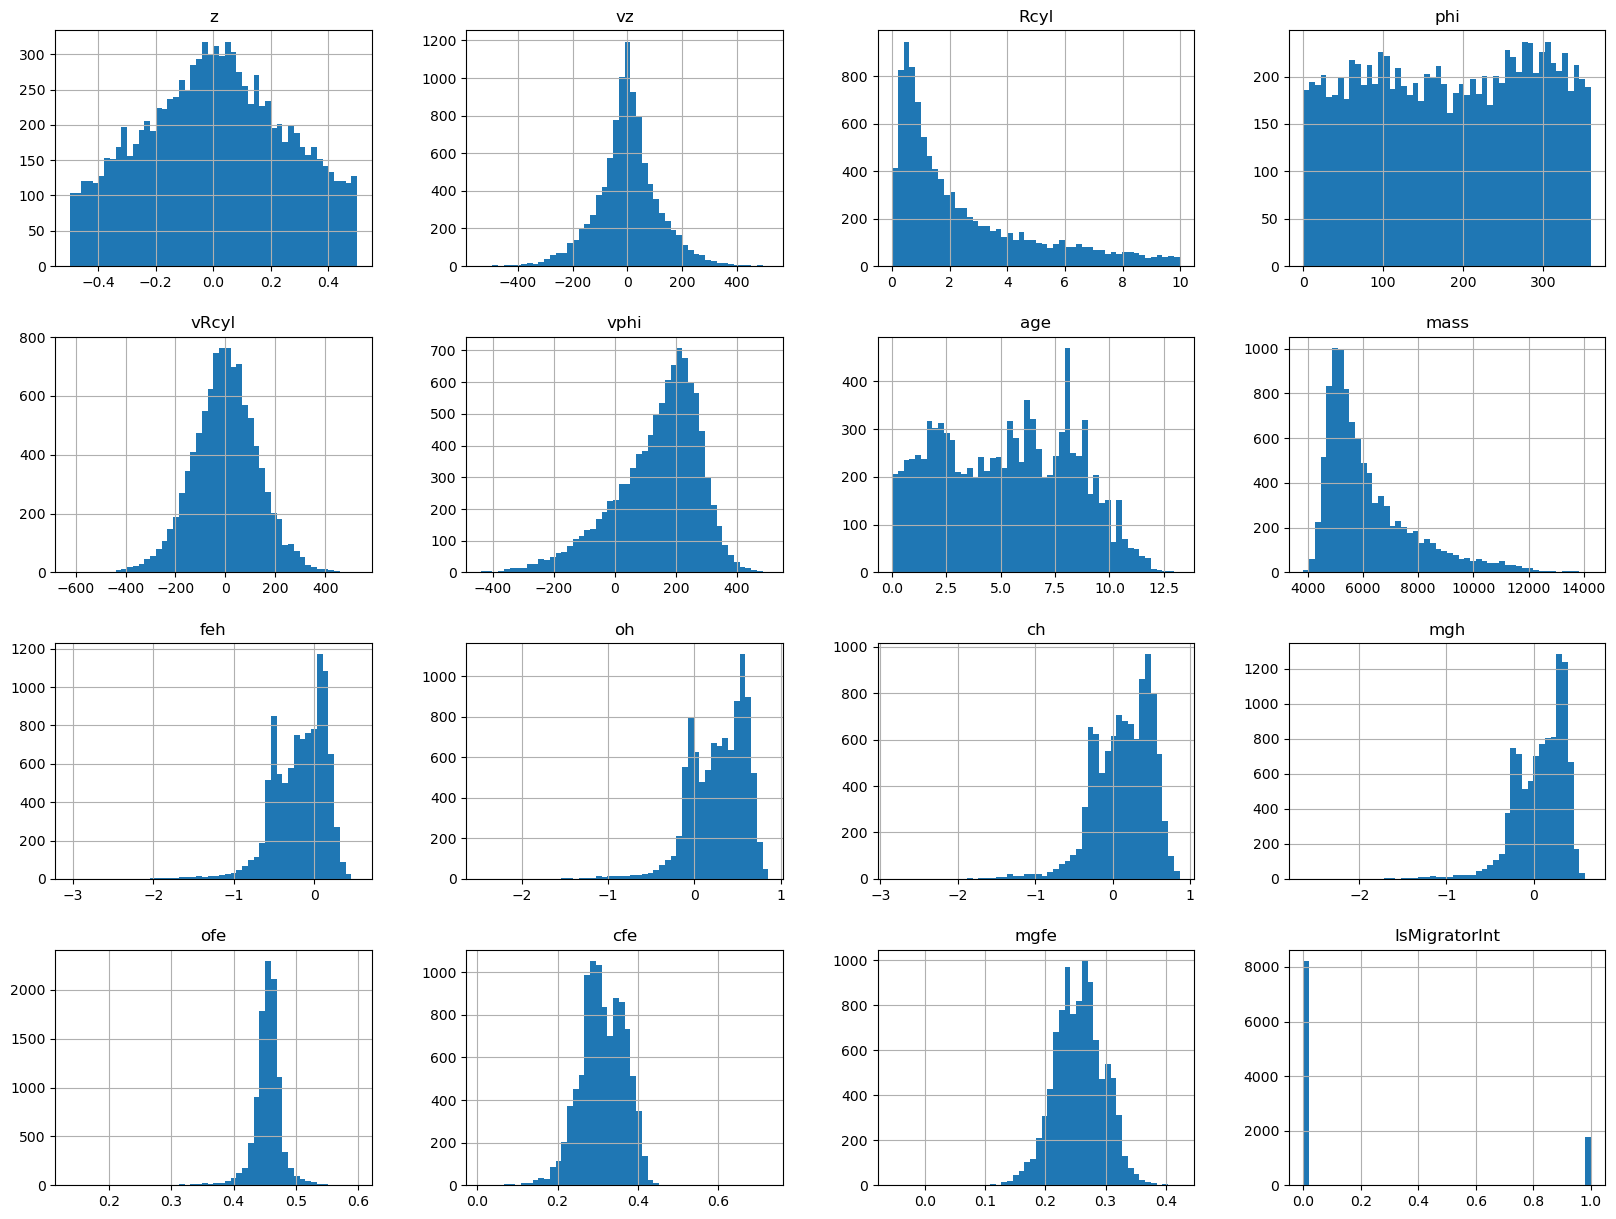

In [4]:
Df.hist(bins = 50, figsize = (20, 15));
#plt.savefig("Histograms")

In [5]:
import statsmodels.api as sm
import time
import itertools
from ISLP.models import (ModelSpec as MS,
                         summarize, poly)

In [6]:
#Make dataframe thats called DataFinal that has x_train and y_train
DataFinal = x_train
DataFinal['IsMigratorInt'] = y_train


In [7]:
DataFinalTest = x_test
DataFinalTest['IsMigratorInt'] = y_test

In [8]:
# Found on google
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    X = MS(list(feature_set)).fit_transform(DataFinal[list(feature_set)])
    model = sm.GLM(
        DataFinal["IsMigratorInt"]
        , X
        , family = sm.families.Binomial()
        )
    regr = model.fit()
    TErate = np.mean((regr.predict(X) >= 0.5) != DataFinal['IsMigratorInt'])
    MSEtest: float = ((regr.predict((sm.add_constant(DataFinalTest[list(feature_set)])) ) - y_test)**2).mean()

    return {"model": regr, "TErate": TErate, "MSEtest": MSEtest}

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(DataFinal.iloc[:,:-2], k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['TErate'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_best = pd.DataFrame(columns=["TErate", "model", "MSEtest"])

tic = time.time()
for i in range(len(DataFinal.iloc[:,:-1].columns)):
    models_best.loc[i] = getBest(i)
 
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 1 models on 0 predictors in 0.008578062057495117 seconds.
Processed 14 models on 1 predictors in 0.18761444091796875 seconds.
Processed 91 models on 2 predictors in 1.2348370552062988 seconds.
Processed 364 models on 3 predictors in 3.766746997833252 seconds.
Processed 1001 models on 4 predictors in 16.95824408531189 seconds.
Processed 2002 models on 5 predictors in 43.77931809425354 seconds.
Processed 3003 models on 6 predictors in 74.45901489257812 seconds.
Processed 3432 models on 7 predictors in 129.4237072467804 seconds.
Processed 3003 models on 8 predictors in 117.2348210811615 seconds.
Processed 2002 models on 9 predictors in 118.50195097923279 seconds.
Processed 1001 models on 10 predictors in 51.83594107627869 seconds.
Processed 364 models on 11 predictors in 19.69292402267456 seconds.
Processed 91 models on 12 predictors in 10.194963932037354 seconds.
Processed 14 models on 13 predictors in 0.7969040870666504 seconds.
Processed 1 models on 14 predictors in 0.0445878

KeyError: 'TErate'

In [ ]:
# i = 15
# models_best.loc[i] = getBest(i)

In [10]:
Outcome = models_best.apply(lambda row: row[1].params, axis=1) # get the parameters of the best model for each number of predictors
Outcome = pd.DataFrame(Outcome)
Outcome.to_csv('OutcomeBestSubsetSelection.csv')
Outcome

,Rcyl,age,cfe,ch,feh,intercept,mass,mgh,ofe,oh,phi,vRcyl,vphi,vz,z
0,NaN,NaN,NaN,NaN,NaN,-1.531514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.480334,NaN,NaN,NaN,NaN,-3.091869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.499571,NaN,-5.190512,NaN,NaN,-1.546326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.476725,NaN,NaN,NaN,-1.330910,-3.958859,NaN,NaN,NaN,NaN,NaN,NaN,0.003773,NaN,NaN
4,0.476695,NaN,NaN,NaN,-1.330455,-3.958941,NaN,NaN,NaN,NaN,NaN,NaN,0.003771,NaN,0.108171
5,0.461192,NaN,-8.214236,NaN,NaN,-6.311279,NaN,NaN,10.963748,NaN,0.000884,NaN,0.003750,NaN,NaN
6,0.473050,NaN,NaN,NaN,NaN,-2.941084,-0.000111,NaN,NaN,NaN,0.000777,-0.000255,0.002523,-0.001045,NaN
7,0.395914,-0.336400,NaN,-13.673060,NaN,-1.051335,NaN,12.865216,NaN,NaN,0.000791,-0.000261,0.003017,NaN,NaN
8,0.409447,-0.376400,NaN,NaN,-31.011171,-2.704321,NaN,29.159648,-14.986093,NaN,0.000805,NaN,0.003173,-0.000896,NaN
9,0.409994,-0.379826,NaN,NaN,-15.961629,-2.581059,-0.000015,29.073794,NaN,-14.965851,0.000800,NaN,0.003172,-0.000896,NaN


In [11]:
TEMSE = models_best[['TErate', 'MSEtest']]
TEMSE.to_csv('TEreteAndMSETest.csv')
TEMSE

,TErate,MSEtest
0,0.177772,0.145027
1,0.16127,0.11626
2,0.158145,0.114785
3,0.155769,0.110372
4,0.155644,0.11027
5,0.155019,0.110256
6,0.154644,0.113629
7,0.153769,0.109674
8,0.153769,0.109783
9,0.153394,0.109786


In [ ]:
# rsquare = models_best.apply(lambda row: row[1].rsquared, axis=1) # get the R^2 of the best model for each number of predictors
bic = models_best.apply(lambda row: row[1].bic, axis=1) # get the BIC of the best model for each number of predictors
aic = models_best.apply(lambda row: row[1].aic, axis=1) # get the Mallow's Cp of the best model for each number of predictors
# print(rsquare)
# print(dir(models_best.loc[2, "model"]))


C:\Users\chril\AppData\Local\Temp\ipykernel_6912\357770356.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bic = models_best.apply(lambda row: row[1].bic, axis=1) # get the BIC of the best model for each number of predictors
c:\Users\chril\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainth

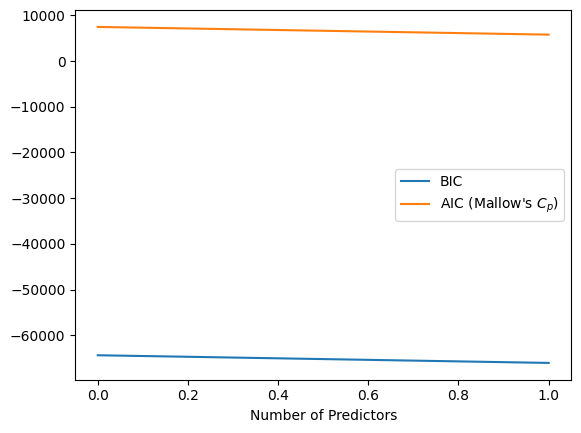

In [ ]:
# plt.plot(rsquare, label="$R^2$")
# plt.legend()
# plt.xlabel('Number of Predictors')
# plt.show()

plt.plot(bic, label="BIC")
plt.plot(aic, label="AIC (Mallow's $C_p$)")
plt.legend()
plt.xlabel('Number of Predictors');
plt.savefig("BICandAIC")

In [ ]:
print(bic.idxmin()) #Finds where minimum  and maximum values are
print(aic.idxmin())
# print(rsquare.idxmax())

# print(rsquare.max()) #To compare k=4 and k=3
# print(rsquare[3])


1
1
